In [2]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow.keras.datasets as DT
import tensorflow as tf
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import sklearn.metrics as skm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from time import time
from sklearn.linear_model import LogisticRegression
import numpy.random as rd
from sklearn.model_selection import GridSearchCV
from keras.datasets import fashion_mnist
from sklearn.svm import LinearSVC

In [3]:
#Função para mostrar as matrizes de confusão
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig=plt.figure(figsize=(6.5,6.5))
    plt.imshow(cm, interpolation='none', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,ha='right')
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #return fig

In [4]:
fashion_minist=keras.datasets.fashion_mnist
(X1,y1),(X2,y2)=fashion_mnist.load_data()
idx=rd.permutation(X1.shape[0])
X1=X1[idx]*1.#/255-.5#Normalization
y1=y1[idx]


idx=np.argsort(y2)
y2=y2[idx]
X2=X2[idx,:]*1.#/255-.5#Normalization

Y1=keras.utils.to_categorical(y1)
Y2=keras.utils.to_categorical(y2)

In [41]:
mlp=keras.Sequential()
mlp.add(keras.layers.Flatten(input_shape=[28,28]))
mlp.add(keras.layers.Normalization(mean=128,variance=128))
mlp.add(keras.layers.Dense(100, activation="relu"))
mlp.add(keras.layers.Dropout(.4))
mlp.add(keras.layers.Dense(100, activation="relu"))
mlp.add(keras.layers.Dropout(.4))
mlp.add(keras.layers.Dense(100, activation="relu"))
mlp.add(keras.layers.Dropout(.4))
mlp.add(keras.layers.Dense(100, activation="relu"))
mlp.add(keras.layers.Dense(10, activation="softmax"))

In [36]:
mlp.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 normalization (Normalizatio  (None, 784)              1569      
 n)                                                              
                                                                 
 dense_27 (Dense)            (None, 100)               78500     
                                                                 
 dropout_17 (Dropout)        (None, 100)               0         
                                                                 
 dense_28 (Dense)            (None, 100)               10100     
                                                                 
 dropout_18 (Dropout)        (None, 100)               0         
                                                      

In [42]:
mlp.compile(optimizer="nadam", loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
Y2.shape

(10000, 10)

In [15]:
Y1[:5,:]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [43]:
train = mlp.fit(X1, Y1, epochs=20, batch_size=1024, validation_data=(X2, Y2))

Epoch 1/20
59/59 [==============================] - 7s 53ms/step - loss: 2.3011 - accuracy: 0.3323 - val_loss: 0.9896 - val_accuracy: 0.6872
Epoch 2/20
59/59 [==============================] - 3s 44ms/step - loss: 1.1746 - accuracy: 0.5902 - val_loss: 0.7172 - val_accuracy: 0.7674
Epoch 3/20
59/59 [==============================] - 3s 43ms/step - loss: 0.9191 - accuracy: 0.6736 - val_loss: 0.6035 - val_accuracy: 0.7924
Epoch 4/20
59/59 [==============================] - 3s 44ms/step - loss: 0.8045 - accuracy: 0.7197 - val_loss: 0.5810 - val_accuracy: 0.7988
Epoch 5/20
59/59 [==============================] - 3s 43ms/step - loss: 0.7428 - accuracy: 0.7400 - val_loss: 0.5438 - val_accuracy: 0.8166
Epoch 6/20
59/59 [==============================] - 3s 46ms/step - loss: 0.6995 - accuracy: 0.7576 - val_loss: 0.5356 - val_accuracy: 0.8061
Epoch 7/20
59/59 [==============================] - 3s 44ms/step - loss: 0.6728 - accuracy: 0.7666 - val_loss: 0.5136 - val_accuracy: 0.8223
Epoch 8/20
59

In [44]:
h=train.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

(0.0, 20.0, 0.0, 1.0)

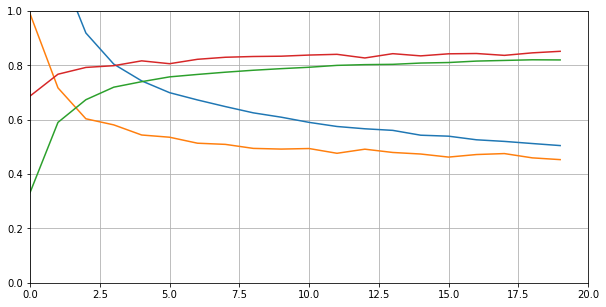

In [46]:
plt.figure(figsize=(10,5))
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.grid()
plt.axis([0,20,0,1])

In [48]:
y2e=mlp.predict(X2)
y2e=np.argmax(y2e,axis=1)
print(confusion_matrix(y2,y2e))
print('Score:', np.sum(y2==y2e)/y2.shape[0]*100)

[[790   0   9  42   3   0 145   2   9   0]
 [  1 956   1  31   2   0   7   0   2   0]
 [  6   1 777  17 112   0  84   0   3   0]
 [ 28   7   9 868  39   0  47   0   2   0]
 [  0   2 125  35 747   0  85   0   6   0]
 [  0   0   1   2   0 886   0  82   3  26]
 [133   1 115  34  73   0 632   0  12   0]
 [  0   0   0   0   0  12   0 964   0  24]
 [  2   0   0   6   3   2  18   5 964   0]
 [  0   0   0   0   0   4   0  62   1 933]]
Score: 85.17


In [50]:
mlp.save('xto.h5')

In [5]:
cnn=keras.Sequential()
cnn.add(keras.layers.Conv2D(16, (3, 3), activation='relu',input_shape=[28,28,1]))
cnn.add(keras.layers.Conv2D(16, (3, 3), activation='relu'))
cnn.add(keras.layers.Conv2D(16, (3, 3), activation='relu'))
cnn.add(keras.layers.AveragePooling2D((2, 2)))
cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(132, activation='relu'))
cnn.add(keras.layers.Dense(10, activation='softmax'))



In [6]:
X1=X1[:,:,:,np.newaxis]
X2=X2[:,:,:,np.newaxis]

In [7]:
cnn.compile(optimizer="nadam", loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
train = cnn.fit(X1, Y1, epochs=12, batch_size=1024, validation_data=(X2, Y2))

Epoch 1/12
59/59 [==============================] - 15s 247ms/step - loss: 0.2545 - accuracy: 0.9049 - val_loss: 0.3243 - val_accuracy: 0.8852
Epoch 2/12
59/59 [==============================] - 15s 251ms/step - loss: 0.2399 - accuracy: 0.9110 - val_loss: 0.3241 - val_accuracy: 0.8833
Epoch 3/12
59/59 [==============================] - 15s 263ms/step - loss: 0.2201 - accuracy: 0.9182 - val_loss: 0.3482 - val_accuracy: 0.8757
Epoch 4/12
59/59 [==============================] - 15s 255ms/step - loss: 0.2076 - accuracy: 0.9229 - val_loss: 0.3001 - val_accuracy: 0.8967
Epoch 5/12
59/59 [==============================] - 15s 252ms/step - loss: 0.1941 - accuracy: 0.9277 - val_loss: 0.3226 - val_accuracy: 0.8849
Epoch 6/12
59/59 [==============================] - 15s 250ms/step - loss: 0.1846 - accuracy: 0.9314 - val_loss: 0.3032 - val_accuracy: 0.8991
Epoch 7/12
59/59 [==============================] - 14s 244ms/step - loss: 0.1691 - accuracy: 0.9374 - val_loss: 0.3049 - val_accuracy: 0.8979

In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 16)        2320      
                                                                 
 average_pooling2d (AverageP  (None, 11, 11, 16)       0         
 ooling2D)                                                       
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 32)          4640      
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 64)          18496     
                                                        

In [14]:
h=train.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

(0.0, 12.0, 0.0, 1.0)

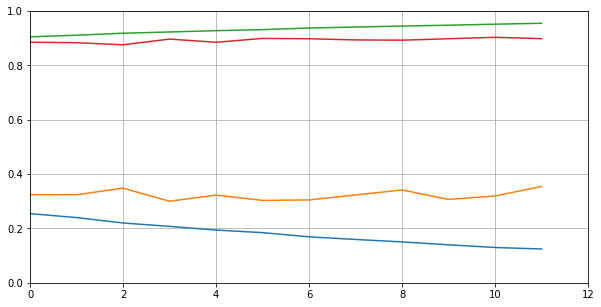

In [16]:
plt.figure(figsize=(10,5))
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.grid()
plt.axis([0,12,0,1])